# Daily aggregate analyis by Country, State, and County

In [330]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#Pulling data from John Hopkins dailydataset on GITHUB
data1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv'

#Grab DATA and assign to a variable :)
today = Table.read_table(data1)

In [331]:
#Aggregate Global cases 
print ("Confirmed cases Worldwide")
np.sum(today.column('Confirmed'))

Confirmed cases Worldwide


720117

In [332]:
#Totals by Country
todaybycountry=today.where('Country_Region',are.equal_to('US'))

print ("Confirmed cases by Country")
np.sum(todaybycountry.column('Confirmed'))

Confirmed cases by Country


140886

In [333]:

#Filter US Data
print ("Let's look at US city data")
todayall=today.where('Country_Region', are.equal_to('US')).sort('Deaths', descending='true')
todayall.where('Confirmed',are.above(0)).sort('Confirmed', descending='true')

Let's look at US city data


FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
36061,New York City,New York,US,2020-03-29 23:08:25,40.7673,-73.9715,33768,678,0,0,"New York City, New York, US"
36119,Westchester,New York,US,2020-03-29 23:08:25,41.1628,-73.7574,8519,10,0,0,"Westchester, New York, US"
36059,Nassau,New York,US,2020-03-29 23:08:25,40.7407,-73.5894,6445,39,0,0,"Nassau, New York, US"
36103,Suffolk,New York,US,2020-03-29 23:08:25,40.8832,-72.8012,5023,40,0,0,"Suffolk, New York, US"
17031,Cook,Illinois,US,2020-03-29 23:08:25,41.8414,-87.8166,3445,40,0,0,"Cook, Illinois, US"
nan,Unassigned,New Jersey,US,2020-03-29 23:08:25,0,0,3020,56,0,0,"Unassigned, New Jersey, US"
26163,Wayne,Michigan,US,2020-03-29 23:08:25,42.2781,-83.3786,2704,56,0,0,"Wayne,Michigan,US"
36087,Rockland,New York,US,2020-03-29 23:08:25,41.1503,-74.0256,2209,8,0,0,"Rockland, New York, US"
34003,Bergen,New Jersey,US,2020-03-29 23:08:25,40.9601,-74.0716,2169,23,0,0,"Bergen, New Jersey, US"
53033,King,Washington,US,2020-03-29 23:08:25,47.4914,-121.835,2159,141,0,0,"King, Washington, US"


In [334]:
#Drill into a State
#Look at a state like Oregon where Confirmed cases are above 5.

State=today.where('Province_State', are.equal_to('Oregon'))
xy=State.where('Confirmed', are.above(5)).sort('Confirmed', descending='true')
xy.show()

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
41067,Washington,Oregon,US,2020-03-29 23:08:25,45.5597,-123.096,154,3,0,0,"Washington, Oregon, US"
41047,Marion,Oregon,US,2020-03-29 23:08:25,44.9029,-122.582,109,3,0,0,"Marion, Oregon, US"
41051,Multnomah,Oregon,US,2020-03-29 23:08:25,45.5475,-122.417,91,2,0,0,"Multnomah, Oregon, US"
41005,Clackamas,Oregon,US,2020-03-29 23:08:25,45.1879,-122.218,39,2,0,0,"Clackamas, Oregon, US"
41043,Linn,Oregon,US,2020-03-29 23:08:25,44.489,-122.537,36,1,0,0,"Linn, Oregon, US"
41017,Deschutes,Oregon,US,2020-03-29 23:08:25,43.9157,-121.229,23,0,0,0,"Deschutes, Oregon, US"
41029,Jackson,Oregon,US,2020-03-29 23:08:25,42.432,-122.729,19,0,0,0,"Jackson, Oregon, US"
41071,Yamhill,Oregon,US,2020-03-29 23:08:25,45.2333,-123.309,13,1,0,0,"Yamhill, Oregon, US"
41053,Polk,Oregon,US,2020-03-29 23:08:25,44.9032,-123.413,13,0,0,0,"Polk, Oregon, US"
41039,Lane,Oregon,US,2020-03-29 23:08:25,43.9373,-122.848,10,1,0,0,"Lane, Oregon, US"


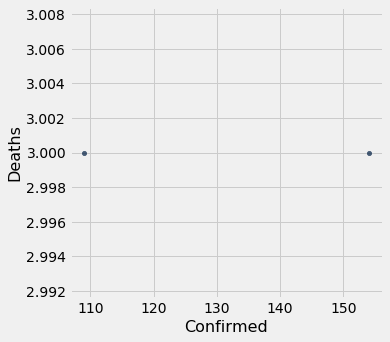

In [335]:
#scatter plot deaths
xyz=State.where('Confirmed', are.above(100)).sort('Confirmed', descending='true')

xyz.scatter('Confirmed', 'Deaths')

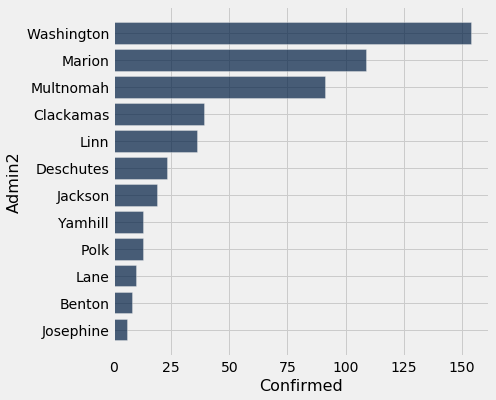

In [337]:
#Bar chart by county in Oregon
xy.barh('Admin2', 'Confirmed')


In [338]:
print ("Confirmed cases in state")
np.sum(xy.column('Confirmed'))

Confirmed cases in state


521

In [339]:
Circle.map_table(State.select('Lat', 'Long_', 'Admin2'), radius='2')

# Aggregate Times Series Analysis for US

In [323]:
#Look at Time series trend
#path_data='/Users/jacob/GCloud/'
#Look at US Time series data for Confirmed and Deaths - based on John Hopkins data set
#I modifed a timeseries dataset but jjust zoomed in on US @ https://github.com/CSSEGISandData/COVID-19
datats='https://raw.githubusercontent.com/jakemathai/COVID19-OREGON/master/USTimeSeries.csv'
UStimeseries =Table.read_table(datats)

In [324]:

Time series data for all of US
UStimeseries.sort('Deaths', descending='true').show()

Date,Date2,Confirmed,Deaths
03-28,2020-03-28,121478,2026
03-27,2020-03-27,101657,1581
03-26,2020-03-26,83836,1209
03-25,2020-03-25,65778,942
03-24,2020-03-24,53740,706
03-23,2020-03-23,43847,557
03-22,2020-03-22,33276,417
03-21,2020-03-21,25489,307
03-20,2020-03-20,19100,244
03-19,2020-03-19,13677,200


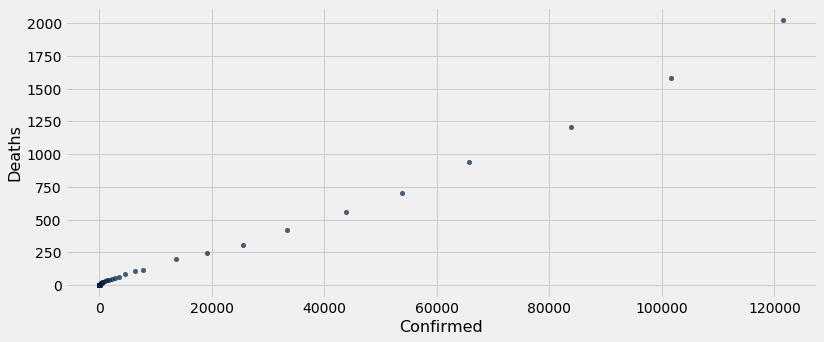

In [240]:
UStimeseries.scatter('Confirmed', 'Deaths', width=12, height=5)

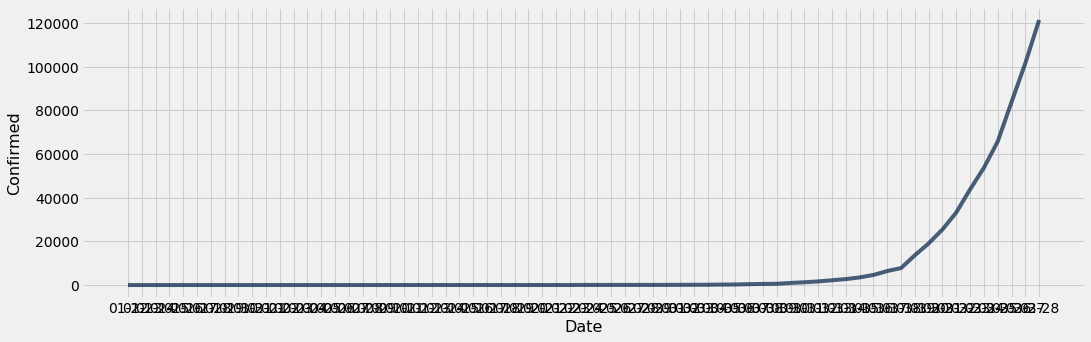

In [256]:

#X axis needs formating -time dimension
UStimeseries.plot('Date','Confirmed', width=16, height=5)

In [264]:
#Calculate the death rate as a percentage of Confirmed cases and make a new colmumn
USTimeSeries1 = UStimeseries.with_columns('Mortality Rate', UStimeseries.column('Deaths')/UStimeseries.column('Confirmed')*100)
USTimeSeries1.sort('Deaths', descending='true')

Date,Date2,Confirmed,Deaths,Mortality Rate
03-28,2020-03-28,121478,2026,1.66779
03-27,2020-03-27,101657,1581,1.55523
03-26,2020-03-26,83836,1209,1.4421
03-25,2020-03-25,65778,942,1.43209
03-24,2020-03-24,53740,706,1.31373
03-23,2020-03-23,43847,557,1.27033
03-22,2020-03-22,33276,417,1.25316
03-21,2020-03-21,25489,307,1.20444
03-20,2020-03-20,19100,244,1.27749
03-19,2020-03-19,13677,200,1.46231


In [274]:
Deathsa = make_array(USTimeSeries1['Deaths'])
Deathsa

67

In [283]:
#Calculate how many deaths increase from previous day
deathmovement=np.diff(Deathsa)
#Just insert zero to the end of array to offset column size
deathmovement1=np.insert(deathmovement,0,0)
deathmovement1

NewUSTimeSeries=USTimeSeries1.with_column('Death increase', deathmovement1)
NewUSTimeSeries.sort('Deaths', descending='true').show()

Date,Date2,Confirmed,Deaths,Mortality Rate,Death increase
03-28,2020-03-28,121478,2026,1.66779,445
03-27,2020-03-27,101657,1581,1.55523,372
03-26,2020-03-26,83836,1209,1.4421,267
03-25,2020-03-25,65778,942,1.43209,236
03-24,2020-03-24,53740,706,1.31373,149
03-23,2020-03-23,43847,557,1.27033,140
03-22,2020-03-22,33276,417,1.25316,110
03-21,2020-03-21,25489,307,1.20444,63
03-20,2020-03-20,19100,244,1.27749,44
03-19,2020-03-19,13677,200,1.46231,82


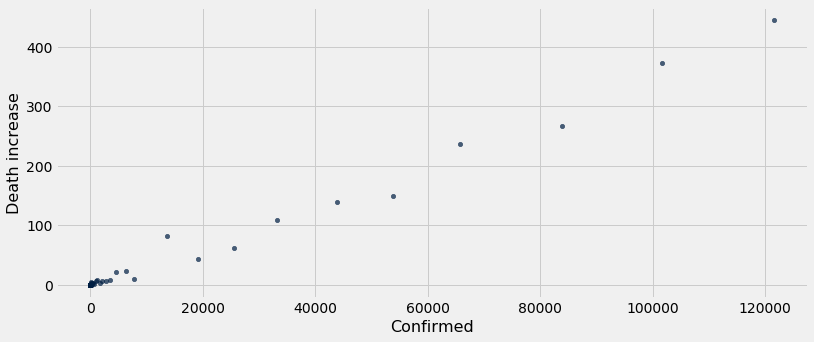

In [289]:
NewUSTimeSeries.scatter('Confirmed', 'Death increase', width=12, height=5)

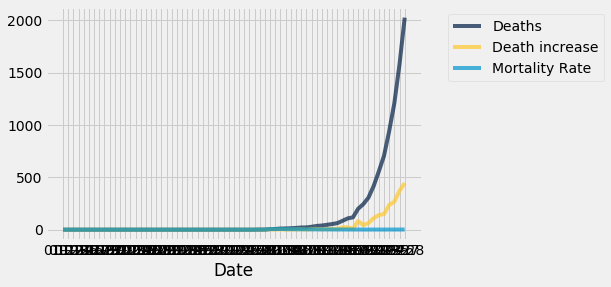

In [296]:
x= NewUSTimeSeries.select('Deaths','Death increase', 'Mortality Rate', 'Date')
x.plot('Date')

# NYC Data -- Linking Age to Pre-Existing conditions 

In [325]:
#This data scraped from NYC daily COVID data site https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf
#This is cumulative and current as of MARCH 28,2020

dataNYC='https://raw.githubusercontent.com/jakemathai/COVID19-OREGON/master/NYCage.csv'

NYCAge = Table.read_table(dataNYC)

In [327]:
print ("NYC Deaths data by underlying conditon and age dimension :")
print ("Yes=Patient had Pre-Existing Medical condition, No= Patient had No pre-Existing Medical condition, Pending=Not determined yet")
NYCAge

NYC Deaths data by underlying conditon and age dimension :
Yes=Patient had Pre-Existing Medical condition, No= Patient had No pre-Existing Medical condition, Pending=Not determined yet


Age,Yes,No,Pending
0-17,0,0,0
18-44,23,1,8
45-64,125,8,28
65-74,125,2,31
75 and over,254,6,61


NYC data -- plot Deaths underlying conditon (e.g.: Yes,No, Pending) by Age:
Yes=Patient had Pre-Existing Medical condition, No= Patient had No pre-Existing Medical condition, Pending=Not determined yet


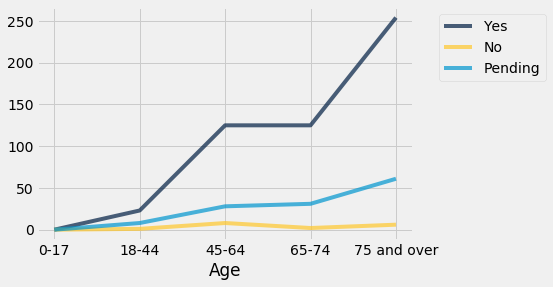

In [329]:
print ("NYC data -- plot Deaths underlying conditon (e.g.: Yes,No, Pending) by Age:")

print ("Yes=Patient had Pre-Existing Medical condition, No= Patient had No pre-Existing Medical condition, Pending=Not determined yet")

NYCAge.plot('Age')

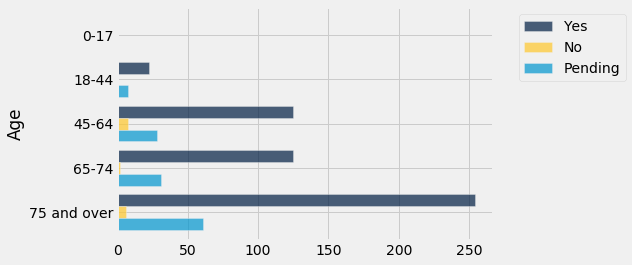

In [320]:
NYCAge.barh('Age')